##### import pandas as pd

In [10]:
from sqlite3 import connect
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
conn = connect(r"C:\Users\madas\Desktop\Capstone\wild fires\FPA_FOD_20170508.sqlite")

In [3]:
conn

In [4]:
tables = pd.read_sql(sql = """SELECT name FROM sqlite_master  
  WHERE type='table';""",con = conn )

### Tables in Database

In [6]:
tables

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


In [ ]:
Fires_Shape = pd.read_sql(sql = 'select * from idx_Fires_Shape', con = conn)

In [9]:
# Print unique values in each column

print("\nUnique values in each column:")
for column in fires_data.columns:
    unique_values = fires_data[column].unique()
    print(f"{column}: {unique_values}")


Unique values in each column:
OBJECTID: [      1       2       3 ... 1880463 1880464 1880465]
FOD_ID: [        1         2         3 ... 300348375 300348377 300348399]
FPA_ID: ['FS-1418826' 'FS-1418827' 'FS-1418835' ... '2015CAIRS28364460'
 '2015CAIRS29218079' '2015CAIRS26733926']
SOURCE_SYSTEM_TYPE: ['FED' 'NONFED' 'INTERAGCY']
SOURCE_SYSTEM: ['FS-FIRESTAT' 'DOI-WFMI' 'FWS-FMIS' 'FA-NFIRS' 'ST-NASF' 'ST-AZAZS'
 'ST-MOMOS' 'IA-AKACC' 'ST-MTMTS' 'ST-SCSCS' 'ST-COCOS' 'ST-MEMES'
 'ST-ORORS' 'ST-MSMSS' 'ST-NMNMS' 'ST-SDSDS' 'ST-UTUTS' 'ST-WAWAS'
 'ST-WYWYS' 'ST-OKOKS' 'ST-WIWIS' 'ST-MIMIS' 'ST-KYKYS' 'ST-ALALS'
 'ST-ARARS' 'ST-GAGAS' 'ST-LALAS' 'ST-TNTNS' 'ST-VAVAS' 'ST-FLFLS'
 'ST-NCNCS' 'IA-ICS209' 'ST-CACDF' 'ST-CTCTS' 'ST-NENES' 'ST-TXTXS'
 'IA-PRIITF' 'IA-HIWMO']
NWCG_REPORTING_AGENCY: ['FS' 'BIA' 'TRIBE' 'BLM' 'NPS' 'BOR' 'FWS' 'ST/C&L' 'DOD' 'IA' 'DOE']
NWCG_REPORTING_UNIT_ID: ['USCAPNF' 'USCAENF' 'USCASHF' ... 'USPRPRS' 'USWYPLX' 'USHINPS']
NWCG_REPORTING_UNIT_NAME: ['Plumas Nati

Shape: [b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@|\x01\x00\x00\x00\xe8d\xc2\x92_@^\xc0\xe0\xc8l\x98\xba\x04D@\xfe'
 b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\xc0\x90\xc6U]nwC@T\xb6\xeej\xe2\x19^\xc0\x90\xc6U]nwC@|\x01\x00\x00\x00T\xb6\xeej\xe2\x19^\xc0\x90\xc6U]nwC@\xfe'
 b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\xc0P\xbbf,\xf9}C@\xd0\xa5\xa0W\x13/^\xc0P\xbbf,\xf9}C@|\x01\x00\x00\x00\xd0\xa5\xa0W\x13/^\xc0P\xbbf,\xf9}C@\xfe'
 ...
 b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x98^\xc0\x98\xc5\xfdG\xa6=D@P\xb8\x1e\x85\xeb\x98^\xc0\x98\xc5\xfdG\xa6=D@|\x01\x00\x00\x00P\xb8\x1e\x85\xeb\x98^\xc0\x98\xc5\xfdG\xa6=D@\xfe'
 b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb8dL\xc9\x0b\xd6B@x\xba_\xaa~9^\xc0\xb8dL\xc9\x0b\xd6B@|\x01\x00\x00\x00x\xba_\xaa~9^\xc0\xb8dL\xc9\x0b\xd6B@\xfe'
 b'\x00\x01\xad\x10\x00\x00\x1c\xa7\xe8H.5]\xc00`;\x18\xb1!A@\x1c\xa7\xe8H.5]\xc00`;\x18\xb1!A@|\x01\x00\x00\x00\x1c\xa7\xe8H.5]\xc00`;\x1

In [14]:
# Print unique values in each column with their counts
print("\nUnique values in each column with counts:")
for column in fires_data.columns:
    unique_counts = fires_data[column].value_counts()
    print(f"\n{column}:")
    print(unique_counts)


Unique values in each column with counts:

OBJECTID:
1          1
1253654    1
1253652    1
1253651    1
1253650    1
          ..
626819     1
626818     1
626817     1
626816     1
1880465    1
Name: OBJECTID, Length: 1880465, dtype: int64

FOD_ID:
1            1
1656874      1
1656872      1
1656871      1
1656870      1
            ..
676216       1
676215       1
676214       1
676213       1
300348399    1
Name: FOD_ID, Length: 1880465, dtype: int64

FPA_ID:
SFO-2015CACDFLNU003791     2
FS-1452833                 2
ICS209_2009_KS-DDQ-128     2
FS-1418826                 1
SFO-GA-FY2002-Dodge-092    1
                          ..
SFO-TX02240706-32931       1
SFO-TX02240706-32930       1
SFO-TX02240706-32928       1
SFO-TX02240706-32927       1
2015CAIRS26733926          1
Name: FPA_ID, Length: 1880462, dtype: int64

SOURCE_SYSTEM_TYPE:
NONFED       1362148
FED           481106
INTERAGCY      37211
Name: SOURCE_SYSTEM_TYPE, dtype: int64

SOURCE_SYSTEM:
ST-NASF        711236
DOI-WF


CONT_TIME:
1800    38078
1600    22167
1700    20606
1200    19276
1500    18757
        ...  
0421       14
0524       14
0541       13
0543       13
0429       13
Name: CONT_TIME, Length: 1441, dtype: int64

FIRE_SIZE:
0.10       459145
1.00       221680
0.50       113222
2.00       109493
0.20        75302
            ...  
29.08           1
28.99           1
1518.00         1
9324.00         1
24.74           1
Name: FIRE_SIZE, Length: 13637, dtype: int64

FIRE_SIZE_CLASS:
B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64

LATITUDE:
47.866600    955
33.335300    706
33.351700    605
47.883300    585
17.970539    571
            ... 
37.709628      1
38.374578      1
39.431971      1
38.730903      1
34.263217      1
Name: LATITUDE, Length: 894061, dtype: int64

LONGITUDE:
-110.451800    792
-123.684500    745
-66.246414     571
-110.450700    507
-66.386131     384
              ... 
-71.450833       1
-148.8333

#### Fires_data

In [6]:
fires_data = pd.read_sql(sql = 'select * from Fires', con = conn)

In [11]:
checkpoint_data = fires_data

In [12]:
fires_data.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [13]:
fires_data.head().T

,0,1,2,3,4
OBJECTID,1,2,3,4,5
FOD_ID,1,2,3,4,5
FPA_ID,FS-1418826,FS-1418827,FS-1418835,FS-1418845,FS-1418847
SOURCE_SYSTEM_TYPE,FED,FED,FED,FED,FED
SOURCE_SYSTEM,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT
NWCG_REPORTING_AGENCY,FS,FS,FS,FS,FS
NWCG_REPORTING_UNIT_ID,USCAPNF,USCAENF,USCAENF,USCAENF,USCAENF
NWCG_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest
SOURCE_REPORTING_UNIT,0511,0503,0503,0503,0503
SOURCE_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest


In [19]:
fires_data.shape

(1880465, 39)

In [20]:
fires_data.isna().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

Dropping columns with more than 95% null values

In [21]:
fires_data = checkpoint_data

In [22]:
cols_drop = []

In [23]:
threshold = len(fires_data) * 0.99
fires_data.dropna(thresh=threshold, axis=1, inplace=True)

In [24]:
fires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  FIRE_YEAR                   int64  
 11  DISCOVERY_DATE              float64
 12  DISCOVERY_DOY               int64  
 13  STAT_CAUSE_CODE             float64
 14  STAT_CAUSE_DESCR            object 
 15  FIRE_SIZE                   float64
 16  FIRE_SIZE_CLASS             object 
 17  LATITUDE                    float64
 18  LONGITUDE                   float64
 19  OWNER_CODE           

#### Univariate Analysis

In [25]:
import seaborn as sns

#### NWCG_REPORTING_AGENCY

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


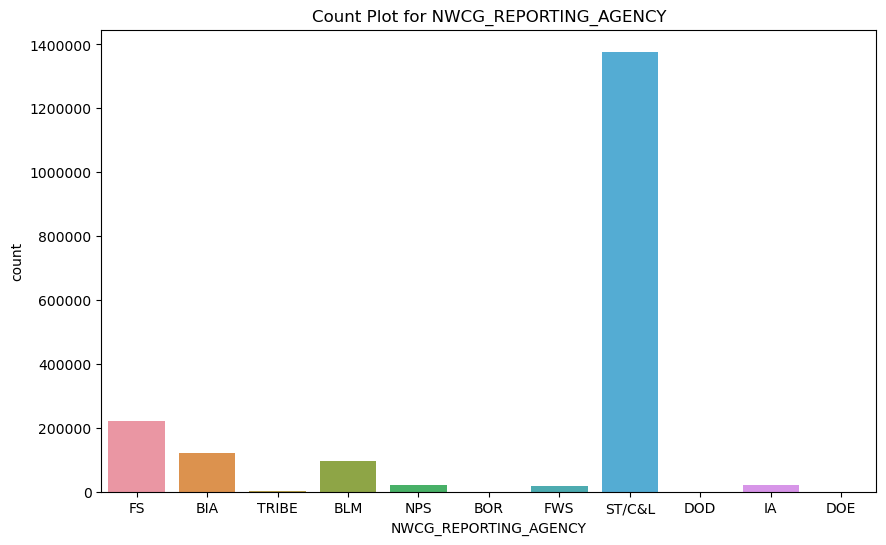

In [27]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=fires_data, x='NWCG_REPORTING_AGENCY')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x))) 
plt.title('Count Plot for NWCG_REPORTING_AGENCY')
plt.show()

In [28]:
fire_year_counts = fires_data['FIRE_YEAR'].value_counts().sort_index()

#### Fire Year

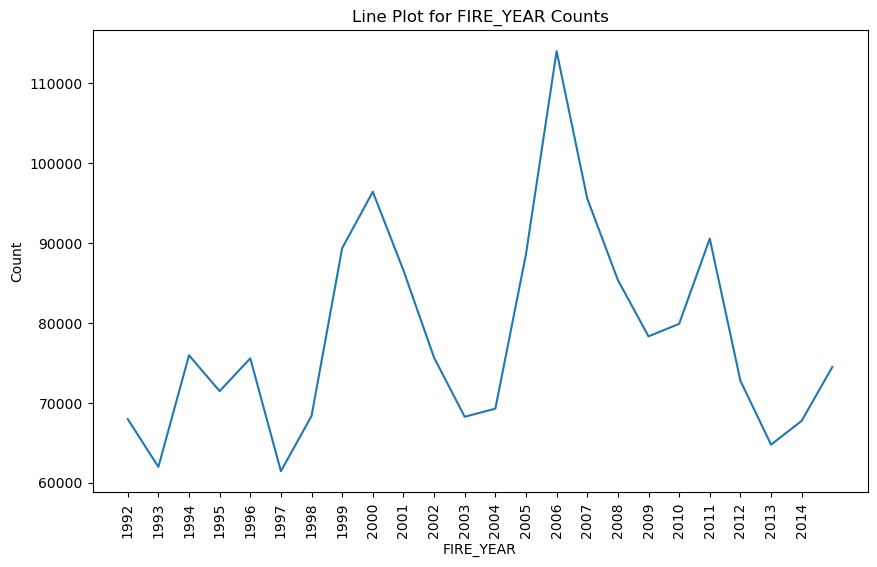

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x=fire_year_counts.index, y=fire_year_counts.values)

plt.title('Line Plot for FIRE_YEAR Counts')
plt.xlabel('FIRE_YEAR')
plt.xticks(range(1992,2015),rotation=90)
plt.ylabel('Count')
plt.show()

#### FIRE_SIZE_CLASS

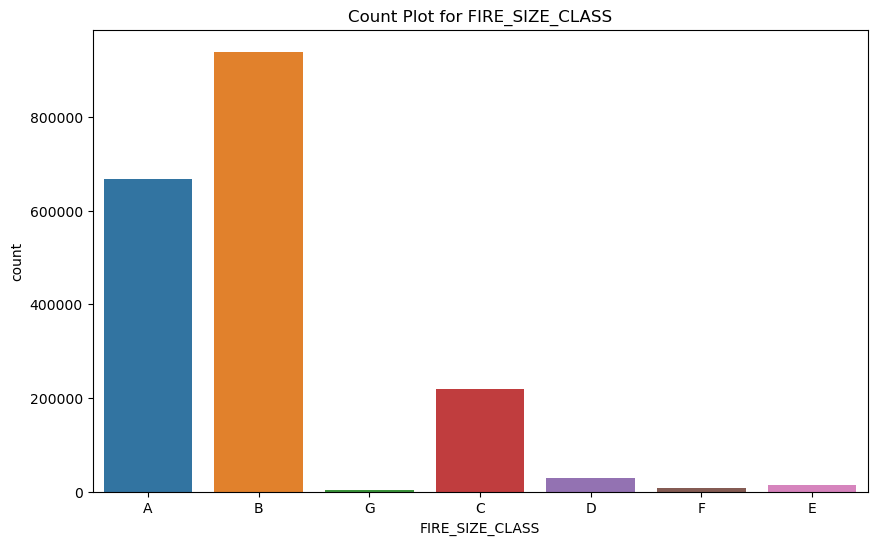

In [30]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=fires_data, x='FIRE_SIZE_CLASS')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x))) 
plt.title('Count Plot for FIRE_SIZE_CLASS')
plt.show()

In [31]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import sqlite3

# Load the Fires table
fires_data = pd.read_sql("SELECT * FROM Fires", con=conn)


In [33]:
# Display the first few rows of the dataset
print(fires_data.head())

# Get a concise summary of the dataframe
print(fires_data.info())

# Descriptive statistics for numerical features
print(fires_data.describe())


   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

In [34]:
# Convert dates from Julian to standard datetime format
fires_data['DISCOVERY_DATE'] = pd.to_datetime(fires_data['DISCOVERY_DATE'], unit='D', origin='julian')
fires_data['CONT_DATE'] = pd.to_datetime(fires_data['CONT_DATE'], unit='D', origin='julian')

# Check for missing values
print(fires_data.isnull().sum())

# Optional: Fill or drop missing values depending on your analysis needs


OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

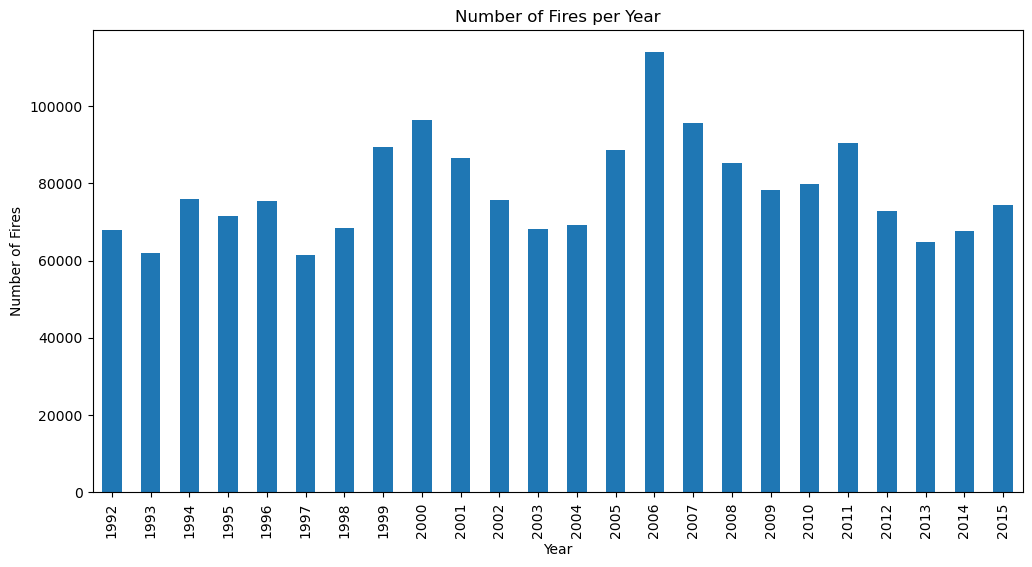

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fires per year
fires_per_year = fires_data['FIRE_YEAR'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
fires_per_year.plot(kind='bar')
plt.title('Number of Fires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()


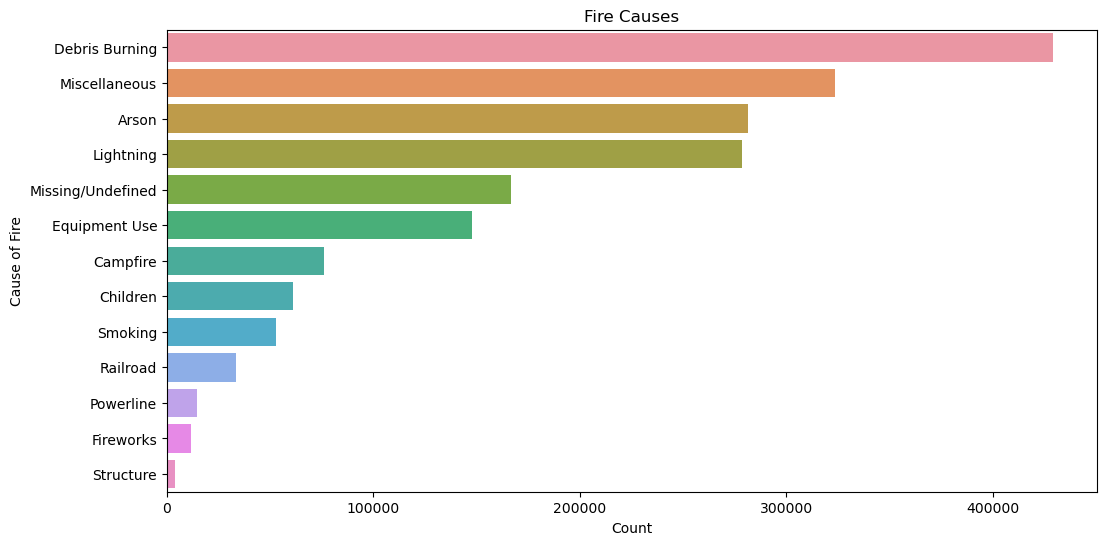

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=fires_data, y='STAT_CAUSE_DESCR', order = fires_data['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Fire Causes')
plt.xlabel('Count')
plt.ylabel('Cause of Fire')
plt.show()


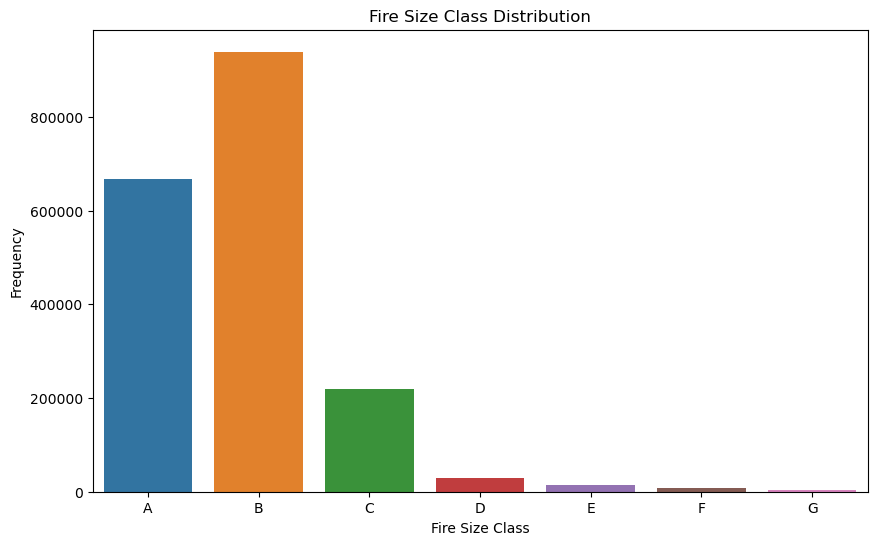

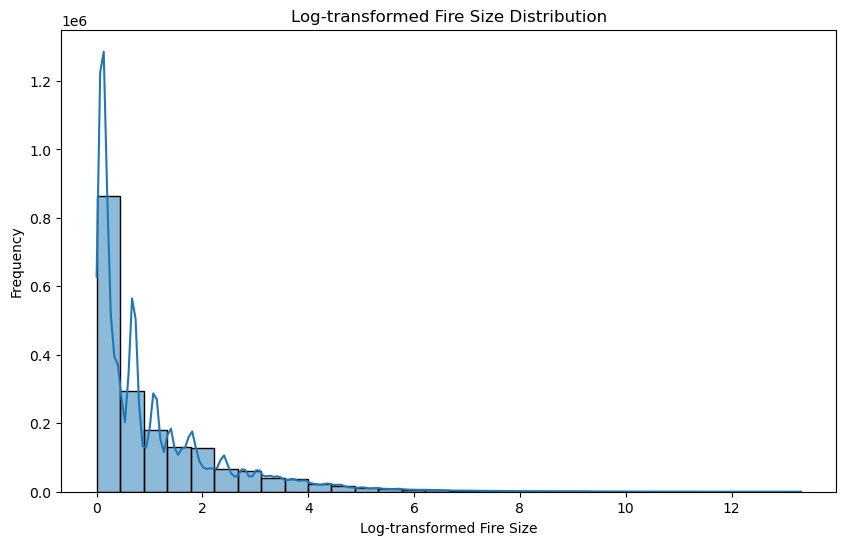

In [37]:
import numpy as np

# Fire size class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=fires_data, x='FIRE_SIZE_CLASS', order=sorted(fires_data['FIRE_SIZE_CLASS'].unique()))
plt.title('Fire Size Class Distribution')
plt.xlabel('Fire Size Class')
plt.ylabel('Frequency')
plt.show()

# Optional: Log-transform for continuous size analysis
fires_data['LOG_FIRE_SIZE'] = np.log1p(fires_data['FIRE_SIZE'])

plt.figure(figsize=(10, 6))
sns.histplot(fires_data['LOG_FIRE_SIZE'], bins=30, kde=True)
plt.title('Log-transformed Fire Size Distribution')
plt.xlabel('Log-transformed Fire Size')
plt.ylabel('Frequency')
plt.show()


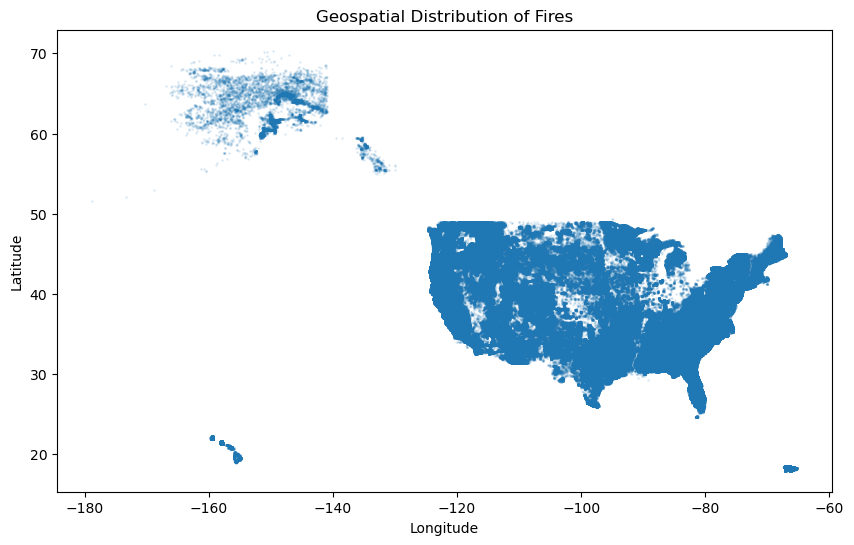

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(fires_data['LONGITUDE'], fires_data['LATITUDE'], s=1, alpha=0.1)
plt.title('Geospatial Distribution of Fires')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [39]:
fires_data = pd.read_sql("SELECT * FROM Fires", con=conn)
units_data = pd.read_sql("SELECT * FROM NWCG_UnitIDActive_20170109", con=conn) 


In [40]:
# Convert to string if necessary
fires_data['NWCG_REPORTING_UNIT_ID'] = fires_data['NWCG_REPORTING_UNIT_ID'].astype(str)
units_data['UnitId'] = units_data['UnitId'].astype(str)


In [41]:
merged_data = pd.merge(fires_data, units_data, left_on='NWCG_REPORTING_UNIT_ID', right_on='UnitId', how='left')


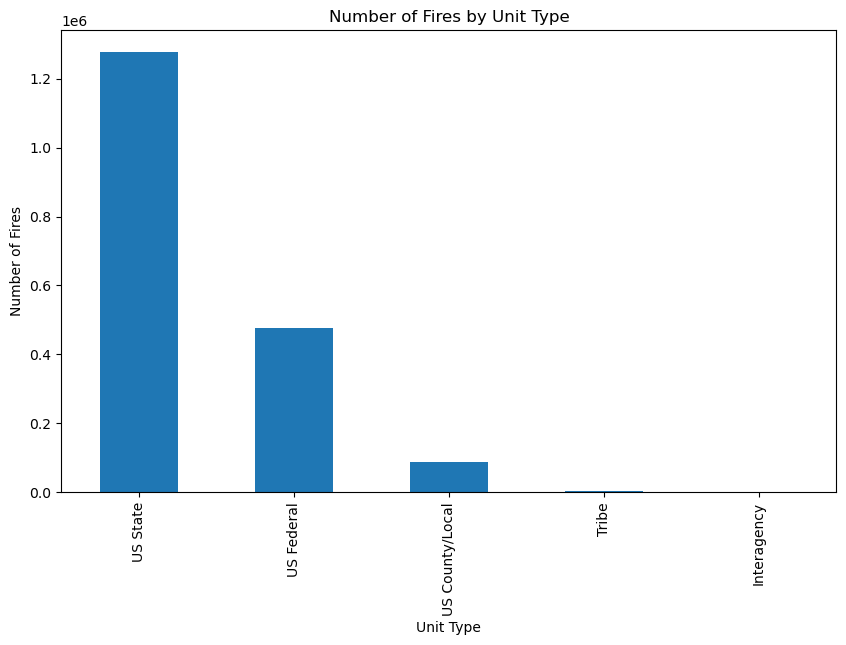

In [42]:
# Counting fires by unit type
fires_by_unit_type = merged_data['UnitType'].value_counts()

plt.figure(figsize=(10, 6))
fires_by_unit_type.plot(kind='bar')
plt.title('Number of Fires by Unit Type')
plt.xlabel('Unit Type')
plt.ylabel('Number of Fires')
plt.show()


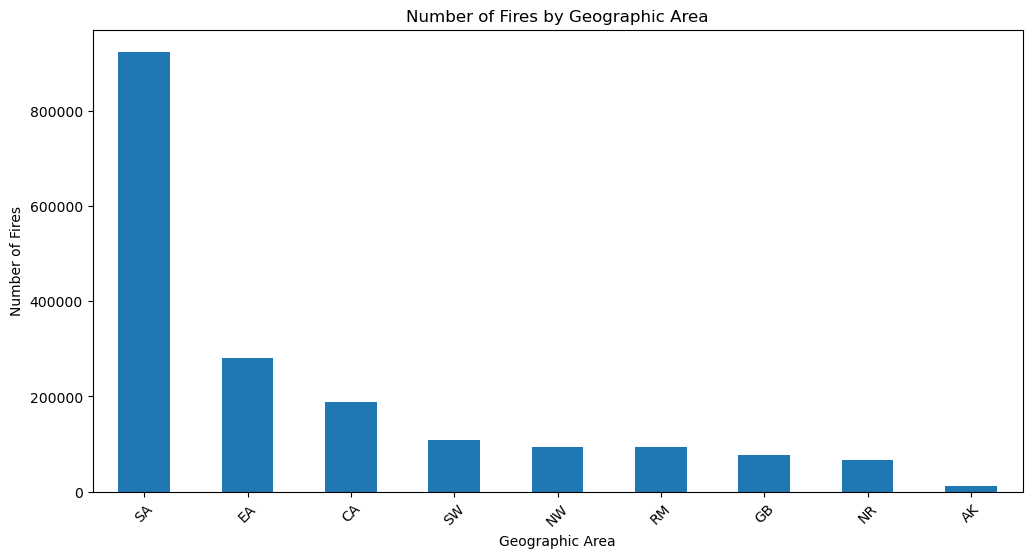

In [43]:
# Counting fires by geographic area
fires_by_geographic_area = merged_data['GeographicArea'].value_counts()

plt.figure(figsize=(12, 6))
fires_by_geographic_area.plot(kind='bar')
plt.title('Number of Fires by Geographic Area')
plt.xlabel('Geographic Area')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.show()


In [44]:
# Selecting relevant features from fires_data for the model
features = fires_data[['FIRE_YEAR', 'STAT_CAUSE_DESCR', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY', 'CONT_DOY', 'FIRE_SIZE']]
target = fires_data['FIRE_SIZE_CLASS']

In [45]:
features_encoded = pd.get_dummies(features, columns=['STAT_CAUSE_DESCR'])


In [46]:
# Replace missing CONT_DOY with the DISCOVERY_DOY assuming one-day fires
features_encoded['CONT_DOY'] = features_encoded['CONT_DOY'].fillna(features_encoded['DISCOVERY_DOY'])


In [47]:
features_encoded['FIRE_DURATION'] = features_encoded['CONT_DOY'] - features_encoded['DISCOVERY_DOY']


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.999513418223684


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression average accuracy: {log_reg_scores.mean()}')

# Gradient Boosting
grad_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
grad_boost_scores = cross_val_score(grad_boost, X_train, y_train, cv=5, scoring='accuracy')
print(f'Gradient Boosting average accuracy: {grad_boost_scores.mean()}')

# Fit the best model (choose based on cross-validation scores)
best_model = grad_boost if grad_boost_scores.mean() > log_reg_scores.mean() else log_reg
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


C:\Users\madas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\madas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression average accuracy: 0.9798374347942799
Gradient Boosting average accuracy: 0.9999986705420365
              precision    recall  f1-score   support

           A       1.00      1.00      1.00    133743
           B       1.00      1.00      1.00    187517
           C       1.00      1.00      1.00     44129
           D       1.00      1.00      1.00      5595
           E       1.00      1.00      1.00      2807
           F       1.00      1.00      1.00      1562
           G       1.00      1.00      1.00       740

    accuracy                           1.00    376093
   macro avg       1.00      1.00      1.00    376093
weighted avg       1.00      1.00      1.00    376093

[[133743      0      0      0      0      0      0]
 [     0 187517      0      0      0      0      0]
 [     0      0  44129      0      0      0      0]
 [     0      0      0   5595      0      0      0]
 [     0      0      0      0   2807      0      0]
 [     0      0      0      0  

In [51]:
# Simulating a small dataset
data = {
    'latitude': [34.5, 35.6, 36.7, 37.8, 38.9],
    'longitude': [-120.5, -121.6, -122.7, -123.8, -124.9],
    'fire_year': [2010, 2011, 2012, 2013, 2014],
    'fire_size': [1.2, 2.3, 3.4, 4.5, 5.6],
    'fire_size_class': ['B', 'B', 'C', 'C', 'D'],  # Target variable
    # Simulated environmental features
    'average_temp': [75, 76, 77, 78, 79],
    'precipitation': [0.1, 0.0, 0.2, 0.1, 0.0]
}
fires_data = pd.DataFrame(data)

# Convert fire_size_class to a binary outcome for simplicity
fires_data['fire_risk'] = fires_data['fire_size_class'].apply(lambda x: 1 if x == 'B' else 0)


In [52]:
# Selecting features and the target
features = fires_data[['latitude', 'longitude', 'average_temp', 'precipitation']]
target = fires_data['fire_risk']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [53]:
# Using RandomForestClassifier as an example model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [54]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [13]:
fires_data['DISCOVERY_DATE'] = pd.to_datetime(fires_data['DISCOVERY_DATE'], format='%Y-%m-%d')



In [14]:
# This is more about utilizing DOY rather than converting it
fires_data['Year'] = fires_data['DISCOVERY_DATE'].dt.year
fires_data['DISCOVERY_DOY_DATE'] = pd.to_datetime(fires_data['Year'].astype(str) + fires_data['DISCOVERY_DOY'].astype(str), format='%Y%j')


In [15]:
# Function to convert HHMM string to HH:MM format
def convert_time(hhmm):
    if pd.isnull(hhmm) or hhmm == '':
        return None  
    else:
        hhmm_str = str(int(hhmm)).zfill(4)  
        return f'{hhmm_str[:2]}:{hhmm_str[2:]}'

fires_data['DISCOVERY_TIME_STANDARD'] = fires_data['DISCOVERY_TIME'].apply(convert_time)


In [16]:
fires_data['DISCOVERY_DATETIME'] = pd.to_datetime(fires_data['DISCOVERY_DATE'].astype(str) + ' ' + fires_data['DISCOVERY_TIME_STANDARD'])


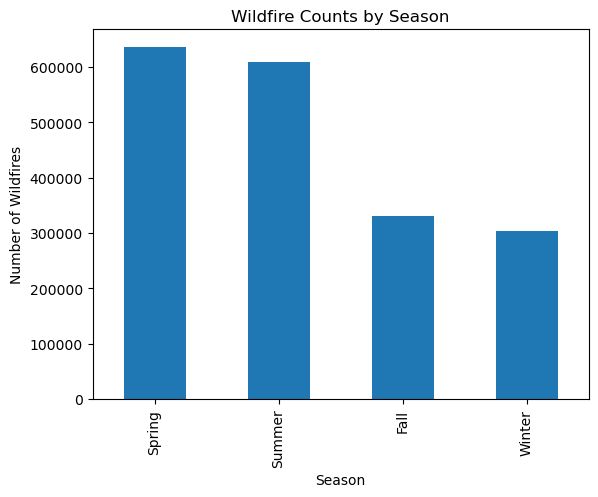

In [19]:
# Extract month and year for further analysis
fires_data['Month'] = fires_data['DISCOVERY_DATE'].dt.month
fires_data['Year'] = fires_data['DISCOVERY_DATE'].dt.year

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

fires_data['Season'] = fires_data['Month'].apply(get_season)

# Plot wildfires by season
seasonal_counts = fires_data['Season'].value_counts()
seasonal_counts.plot(kind='bar', title='Wildfire Counts by Season')
plt.xlabel('Season')
plt.ylabel('Number of Wildfires')
plt.show()


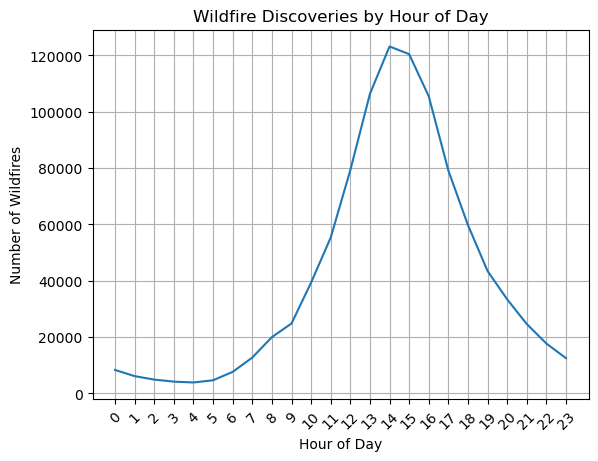

In [20]:
# Assuming DISCOVERY_TIME is standardized and combined with DISCOVERY_DATE
fires_data['Hour'] = fires_data['DISCOVERY_DATETIME'].dt.hour

# Plotting wildfire discoveries by hour of the day
hourly_counts = fires_data.groupby('Hour').size()
hourly_counts.plot(kind='line', title='Wildfire Discoveries by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Wildfires')
plt.xticks(range(0, 24), rotation=45)
plt.grid(visible=True)
plt.show()


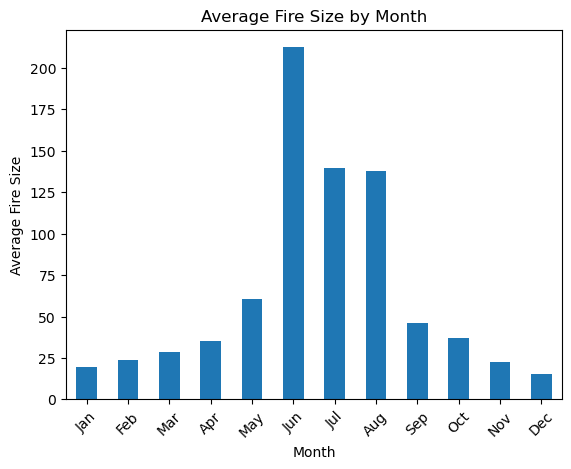

In [21]:
# Example: Average fire size by month
average_size_by_month = fires_data.groupby('Month')['FIRE_SIZE'].mean()
average_size_by_month.plot(kind='bar', title='Average Fire Size by Month')
plt.xlabel('Month')
plt.ylabel('Average Fire Size')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


In [22]:
# Grouping by season and cause, then counting occurrences
season_cause_counts = fires_data.groupby(['Season', 'STAT_CAUSE_DESCR']).size().unstack(fill_value=0)


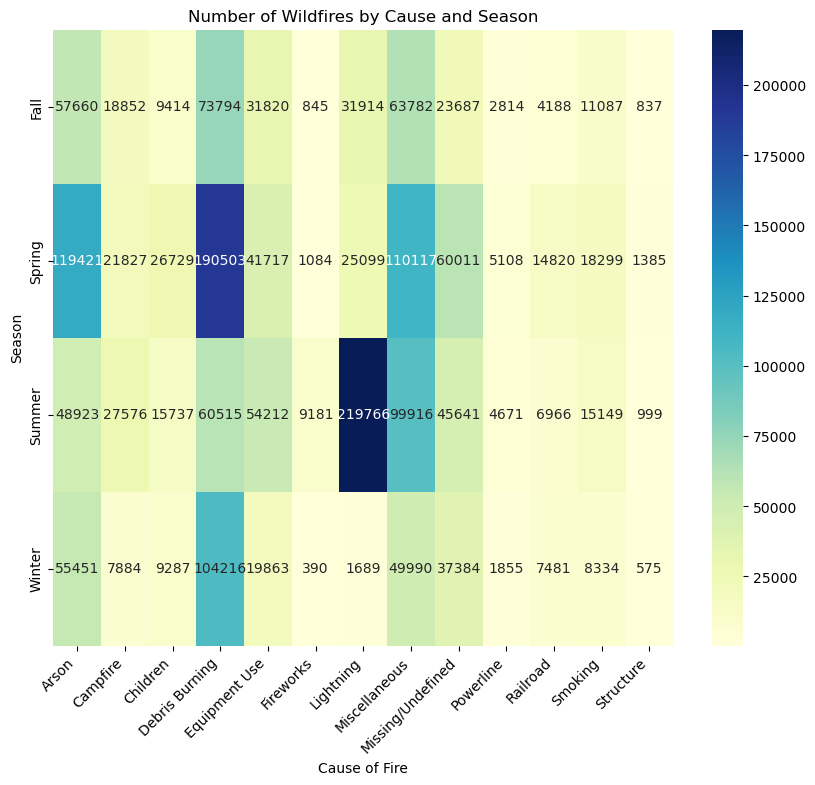

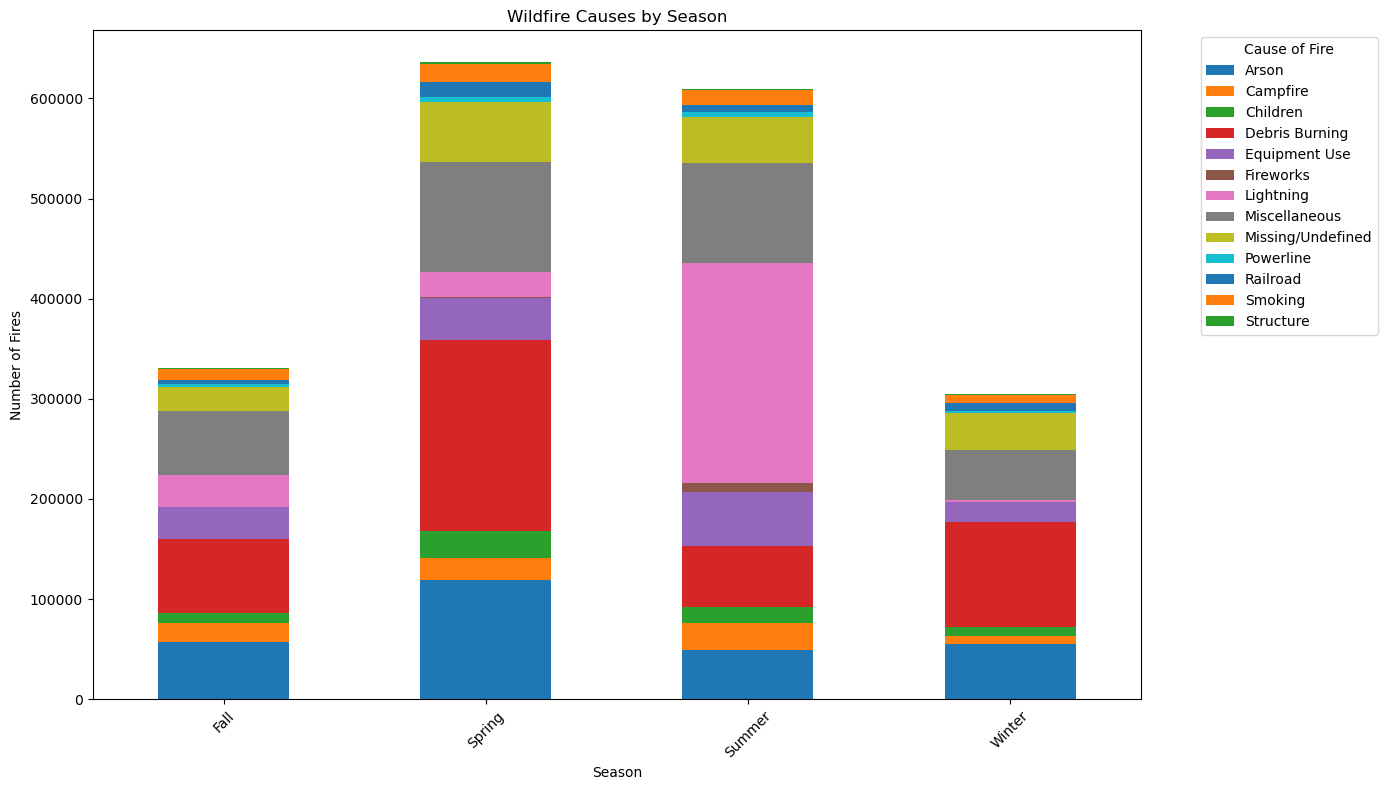

In [23]:
# Heatmap of fire causes by season
plt.figure(figsize=(10, 8))
sns.heatmap(season_cause_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Number of Wildfires by Cause and Season')
plt.xlabel('Cause of Fire')
plt.ylabel('Season')
plt.xticks(rotation=45, ha="right")
plt.show()

# Bar plots for each season
season_cause_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Wildfire Causes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.legend(title='Cause of Fire', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
